### Clustering van films op basis van budget en bruto-omzet
## 1. Inleiding
Het doel van dit onderzoek is om films te groeperen op basis van hun financiële kenmerken (budget en bruto-omzet) en te toetsen of deze clusters overeenkomen met categorieën zoals blockbusters, flops, cultfilms en low-budget producties. We gebruiken k-means clustering en voegen extra dimensies toe (IMDB-score, cast-likes, land) om dieper inzicht te krijgen in succesfactoren. De resultaten worden geïllustreerd met relevante grafieken en bijbehorende Jupyter-code.

## 2. Data en preprocessing
### 2.1 Beschikbare data
- Dataset: 3.881 films, zonder missende waarden in budget en gross zorgt voor complete financiële analyses.

- Distributies zijn sterk rechtsscheef (zie histogrammen Figuur 4 & 5): meeste films draaien rond lage budgetten en opbrengsten.

- Voor k-means standaardiseren we budget en omzet met StandardScaler om clusters niet te domineren door extreme waarden.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [9]:
bestand = "dataset/movie-1-cleaned.csv"
df = pd.read_csv(bestand, encoding='utf-8')

# Toon instellingen om alles zichtbaar te maken
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

print("Aantal films in dataset:", len(df))
df.head()

Aantal films in dataset: 3880


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


## 2.2 Basisstatistieken budget en omzet
| Statistiek         | Budget       | Gross        |
| -----------------  | ------------ | ------------ |
| Aantal             | 3.881        | 3.881        |
| Gemiddelde         | 45.279.540   | 51.160.450   |
| Standaardafwijking | 222.658.700  | 69.852.140   |
| Mediaan            | 24.000.000   | 28.064.230   |
| Min                | 218          | 162          |
| Max                | 12.215.500.000 | 760.505.847 |


## 3. Clusteringmethode
### 3.1 Schalen en k-means
We schalen de kolommen budget en gross met StandardScaler en passen KMeans(n_clusters=4) toe.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['budget','gross']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Clustercentra (budget, gross):", centroids)


Clustercentra (budget, gross): [[8.29769209e+07 1.09501477e+08]
 [1.22155000e+10 2.20141200e+06]
 [1.35730000e+08 2.98888044e+08]
 [2.53424382e+07 2.08675500e+07]]


### 3.2 Clustercentra

### Clusteringmethode
| Cluster | Budget     | Gross      |
| ------- | ---------- | ---------- |
| 0       | 83 mln    | 110 mln   |
| 1       | 12,2 mld| 2,2 mln   |
| 2       | 135 mln   | 299 mln   |
| 3       | 25 mln    | 21 mln    |
Cluster 1 is een outlier met één film en extreme waarden.


### 4. Profielen per cluster
| Cluster | Aantal films | Gem. budget | Gem. omzet | Gem. IMDB-score | Gem. cast-likes | Interpretatie        |
| ------- | ------------ | ----------- | ---------- | --------------- | --------------- | ------------------ |
| 2       | 159          | 135 mln     | 299 mln    | 7,33            | 26.350          | Blockbusters        |
| 0       | 823          | 83 mln      | 110 mln    | 6,66            | 16.135          | Mainstream hits     |
| 3       | 2.898        | 25 mln      | 21 mln     | 6,36            | 9.089           | Low-budget films    |
| 1       | 1            | 12,2 mld    | 2,2 mln    | 7,00            | 1.173           | Outlier (datafout) |


### 4.1 Staafdiagram: aantal films per cluster
Figuur 1 toont de omvang van elke cluster.

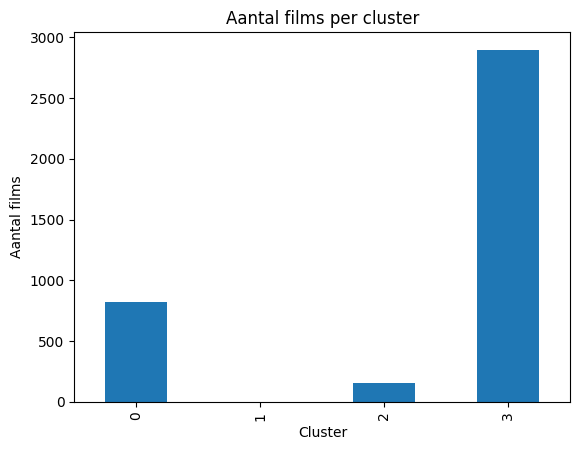

In [19]:
df['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Aantal films per cluster')
plt.xlabel('Cluster')
plt.ylabel('Aantal films')
plt.show()


### 4.2 Staafdiagram: gemiddeld budget per cluster
Figuur 2 vergelijkt de budgetten.

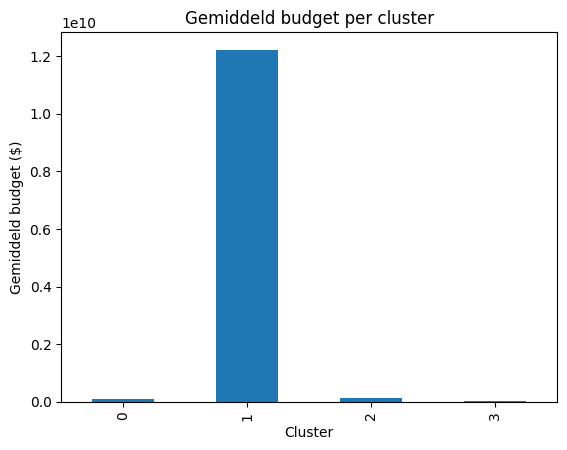

In [20]:
df.groupby('cluster')['budget'].mean().plot(kind='bar')
plt.title('Gemiddeld budget per cluster')
plt.xlabel('Cluster')
plt.ylabel('Gemiddeld budget ($)')
plt.show()


### 4.3 Staafdiagram: gemiddelde omzet per cluster
Figuur 3 toont de omzetverschillen.

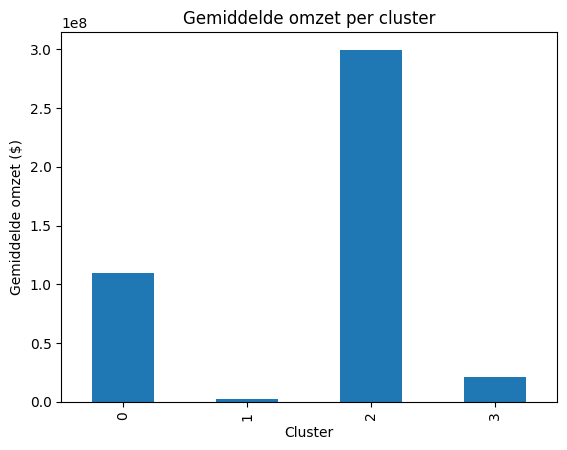

In [22]:
df.groupby('cluster')['gross'].mean().plot(kind='bar')
plt.title('Gemiddelde omzet per cluster')
plt.xlabel('Cluster')
plt.ylabel('Gemiddelde omzet ($)')
plt.show()


## Financiële verdelingen
### 5.1 Histogram van budget
Figuur 4 geeft de budgetverdeling over alle films.

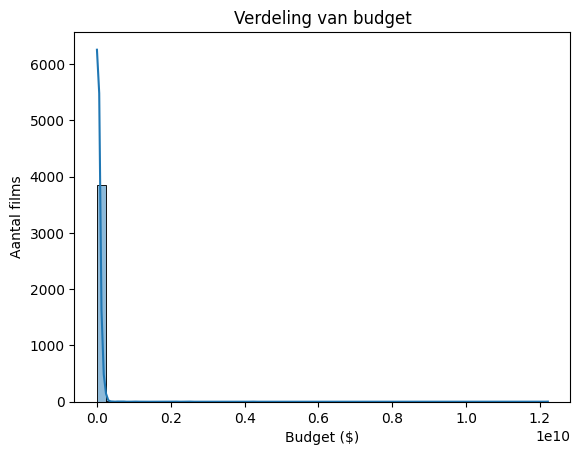

In [24]:
sns.histplot(df['budget'], bins=50, kde=True)
plt.title('Verdeling van budget')
plt.xlabel('Budget ($)')
plt.ylabel('Aantal films')
plt.show()


### 5.2 Histogram van bruto omzet
Figuur 5 toont de omzetverdeling.

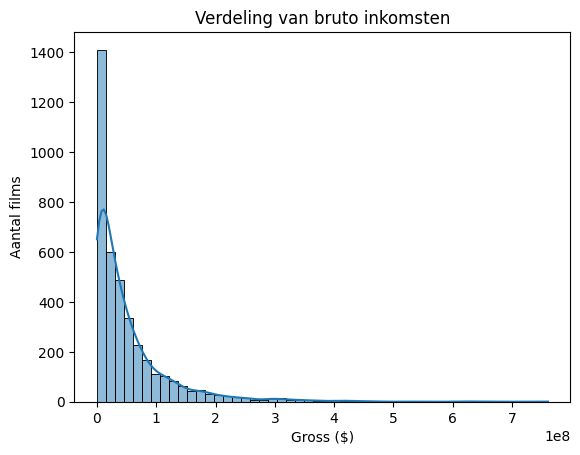

In [25]:
sns.histplot(df['gross'], bins=50, kde=True)
plt.title('Verdeling van bruto inkomsten')
plt.xlabel('Gross ($)')
plt.ylabel('Aantal films')
plt.show()


### 5.3 Boxplot budget per cluster
Figuur 6 maakt duidelijk hoe budgets binnen clusters variëren.

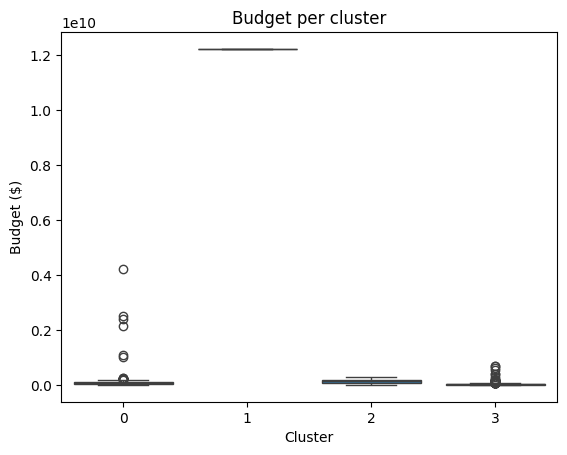

In [27]:
sns.boxplot(x='cluster', y='budget', data=df)
plt.title('Budget per cluster')
plt.xlabel('Cluster')
plt.ylabel('Budget ($)')
plt.show()


### 5.4 Boxplot bruto omzet per cluster
Figuur 7 toont de spreiding van omzet per cluster.

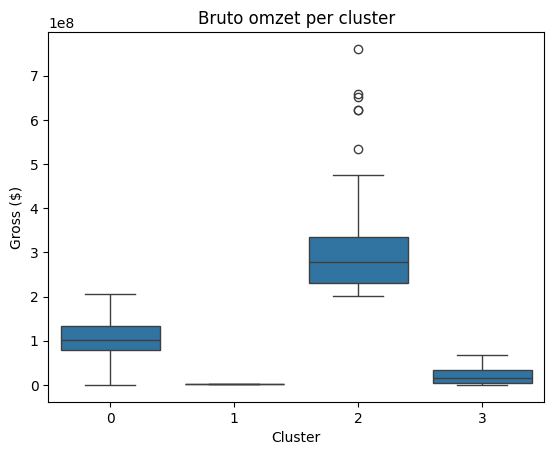

In [28]:
sns.boxplot(x='cluster', y='gross', data=df)
plt.title('Bruto omzet per cluster')
plt.xlabel('Cluster')
plt.ylabel('Gross ($)')
plt.show()


## 6. Samenhang budget & omzet
### 6.1 Scatterplot budget vs. omzet
Figuur 8 plaatst clusters in financiële ruimte.

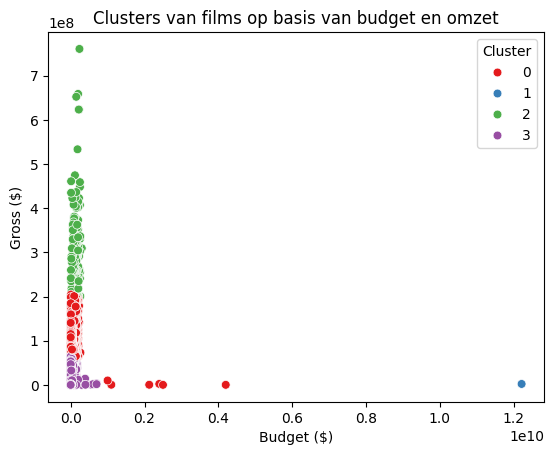

In [29]:
sns.scatterplot(x='budget', y='gross', hue='cluster', data=df, palette='Set1', s=40)
plt.title('Clusters van films op basis van budget en omzet')
plt.xlabel('Budget ($)')
plt.ylabel('Gross ($)')
plt.legend(title='Cluster')
plt.show()


## 7. Kwaliteit en populariteit
### 7.1 Boxplot IMDB-score per cluster
Figuur 9 vergelijkt waarderingen.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18520\1863865320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='imdb_score', data=df, palette='Set2')


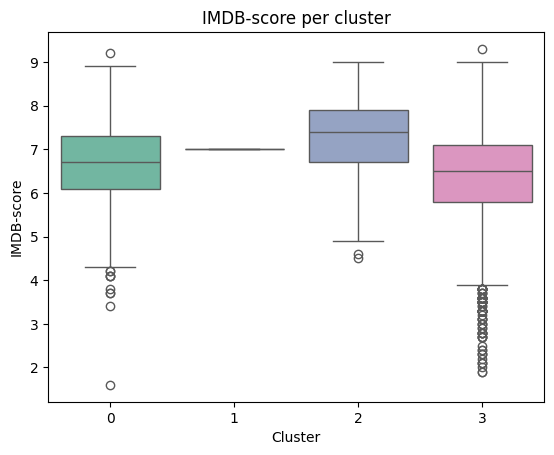

In [30]:
sns.boxplot(x='cluster', y='imdb_score', data=df, palette='Set2')
plt.title('IMDB-score per cluster')
plt.xlabel('Cluster')
plt.ylabel('IMDB-score')
plt.show()


### 7.2 Boxplot cast-likes per cluster
Figuur 10 toont social media-popularity.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18520\1339073971.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='cast_total_facebook_likes', data=df, palette='Set3')


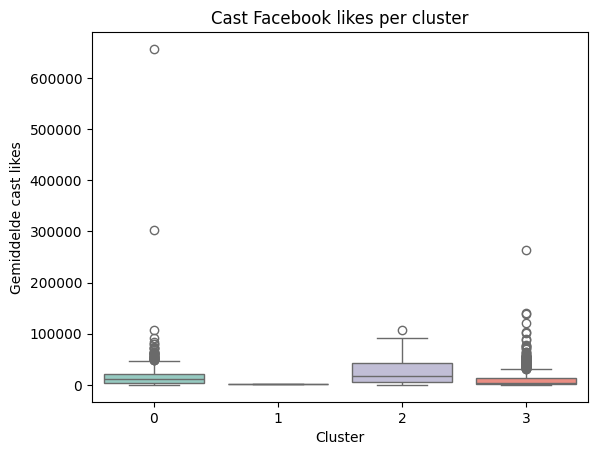

In [31]:
sns.boxplot(x='cluster', y='cast_total_facebook_likes', data=df, palette='Set3')
plt.title('Cast Facebook likes per cluster')
plt.xlabel('Cluster')
plt.ylabel('Gemiddelde cast likes')
plt.show()


## 8. Land- en regisseursanalyse
### 8.1 Staafdiagram gemiddelde IMDB-score per land
Figuur 11 geeft de top 10 landen naar gemiddelde waardering.

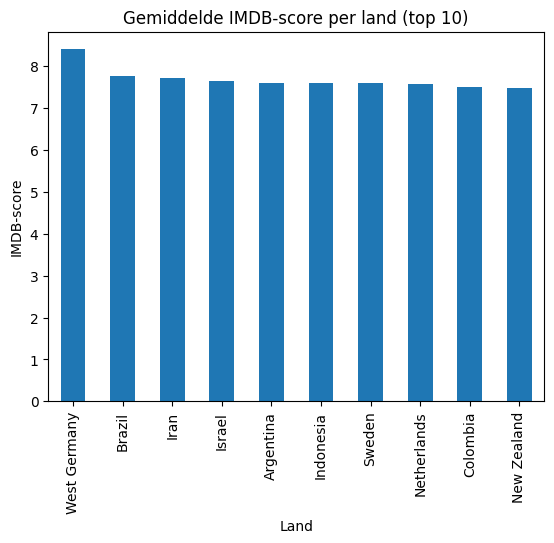

In [34]:
df.groupby('country')['imdb_score'] \
  .mean().sort_values(ascending=False).head(10) \
  .plot(kind='bar')
plt.title('Gemiddelde IMDB-score per land (top 10)')
plt.xlabel('Land')
plt.ylabel('IMDB-score')
plt.show()


### 8.2 Gestapelde staafdiagram aantal films per land per cluster
 Figuur 12 laat landdistributie binnen grote clusters zien.

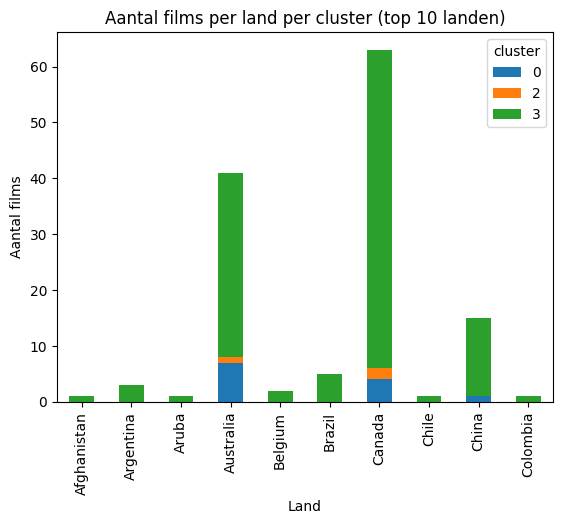

In [35]:
pd.crosstab(df['country'], df['cluster']) \
  .loc[:, [0,2,3]].dropna(how='all').head(10) \
  .plot(kind='bar', stacked=True)
plt.title('Aantal films per land per cluster (top 10 landen)')
plt.xlabel('Land')
plt.ylabel('Aantal films')
plt.show()


## 9. Conclusie
Het clusteren op budget en bruto-omzet levert vier goed te onderscheiden groepen op:

- Blockbusters (hoog-hoog)

- Mainstream hits (gemiddeld-gemiddeld)

- Low-budget films (laag-laag)

- Outlier met foutdata

Er is een sterke koppeling tussen budget en omzet, maar de ROI binnen clusters verschilt sterk: sommige low-budget titels scoren bovengemiddeld.

Hogere budgetten gaan gepaard met betere IMDB-scores en meer cast-likes, wat zowel kwaliteit als marketingkracht weerspiegelt.

Strenge outlierdetectie is cruciaal: foutieve budgetwaarden kunnen de hele clustering vervormen.

### Vervolgonderzoek

- ROI-gebaseerde subclustering om cultfilms te vinden

- Genre- en tijdsanalyse voor trendinzichten

- Integratie van marketing- en distributiedata voor scherpere succesvoorspellingen

Deze kerninzichten helpen bij strategische beslissingen in productie, distributie en marketing.